# Importando as bibliotecas necessárias para a atividade



In [111]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Método para implementação do Grid

In [112]:
class GridWorld:
  # Abaixo há um método privado para definir os atributos do código
  def __init__(self, height, width, start, target, mountains, quicksand):
    self.height = height
    self.width = width
    self.start = start
    self.target = target
    self.mountains = mountains
    self.quicksand = quicksand
    self.grid = self.create_grid()


  # Abaixo a criação do Grid;
  def create_grid(self):
    grid = [[0] * self.width for _ in range(self.height)]

    # Definindo o alvo
    grid[self.target[0]][self.target[1]] = 1

    # Definindo a montanha
    for mountain in self.mountains:
      grid[mountain[0]][mountain[1]] = 2

    # Definindo a areia movediça
    for sand in self.quicksand:
      grid[sand[0]][sand[1]] = 3

    # Retorna as informações do grid
    return grid

In [113]:
# Método para visualização do Grid
def print_grid(grid, current_position):
  # Base para criar a figura
  fig, ax = plt.subplots()

  '''
    Este bloco de código está sendo usado para a plotagem do grid. O marrom
    representa as montanhas e o amarelo representa as areias movediças e o
    verde é o ponto em que o agente deve chegar.
    O que não for colocado como marrom ou amarelo, é a parte em que
    o agente não tem perigo de passar.
  '''

  if isinstance(grid, np.ndarray):
    height, width = grid.shape
  else:
    height = len(grid)
    width = len(grid[0])


  for i in range(height):
    for j in range(width):
      if (i, j) == current_position:
        print("Agent Position", end=" ")
      elif grid[i][j] == 1:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color='green'))
      elif grid[i][j] == 2:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color='brown'))
      elif grid[i][j] == 3:
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color='yellow'))
      else:
        print(".", end= " ")

        # Linhas de grade do grid
        ax.plot([j, j+1], [i, i], color="black", linewidth=0.5)
        ax.plot([j, j], [i, i+1], color="black", linewidth=0.5)

  # Posição do agente no grid
  ax.plot(current_position[1]+0.5, current_position[0]+0.5, "ro")

  # Determinação dos limites dos eixos x e y do grid
  ax.set_xlim(0, width)
  ax.set_ylim(0, height)

  # Mostrando a figura do Grid montada
  plt.show()

# Função das ações possíveis

In [114]:
def get_actions(grid, current_position):
  # Linha vazia para armazenar as tuplas da posição do agente no estado
  actions = []

  '''
  Verifica a posição atual do agente no grid e se é possível se mover para determinada
  direção
  '''
  if current_position[0] > 0 and grid[current_position[0]-1][current_position[1]] != 1:
    actions.append("up")

  if current_position[0] < len(grid)-1 and grid[current_position[0]+1][current_position[1]] != 1:
    actions.append("down")

  if current_position[1] > 0 and grid[current_position[0]][current_position[1]-1] != 1:
    actions.append("left")

  if current_position[1] < len(grid[0])-1 and grid[current_position[0]][current_position[1]+1] != 1:
    actions.append("right")

  # Retornar a lista de ações tomadas pelo agente
  return actions

# Função das recompensas

In [115]:
def get_rewards(grid, current_position, action):
  '''
  Recompensa padrão por ação tomada pelo agente, colocada para que o agente
  não fique no mesmo lugar
  '''
  reward = -1

  '''
  Diferente da ação padrão, se o agente não escolher ficar no mesmo estado,
  a recompensa por ação tomada é de -1, o que o motiva a mudar de posição no
  grid a cada estado
  '''
  if action != "stay":
    reward = -0.1

  # Recompensa de 10 pontos para quando o agente chegar no objetivo
  if current_position == grid.target:
    reward = 10

    # Recompensa negativa se o agente tomar a decisão de ir para as montanhas
  if grid[current_position[0]][current_position[1]] == 2:
    reward = -100

  # Recompensa negativa se o agente tomar a decisão de ir para a areia movediça
  if grid[current_position[0]][current_position[1]] == 3:
    reward = -100

  # Retorna as recompensas
  return reward

# Função com a Lógica do Agente

In [116]:
def agent_steps(grid, current_position):

  '''
  Pega as ações da função de ações possíveis e seleciona uma lista de ações
  para o agente tomar até atender um critério de paradas ou ao número máximo
  de iterações do episódio
  '''
  actions = get_actions(grid, current_position)
  action = numpy.random.choice(actions)

  # Armazena em uma lista as posições do agente a partir de suas ações
  current_position_list = list(current_position)

  # Ações possíveis do agente escolher para tomar a ação
  if action == "up":
    current_position_list[0] -= 1
  elif action == "down":
    current_position_list[0] += 1
  elif action == "left":
    current_position_list[1] -= 1
  elif action == "right":
    current_position_list[1] += 1

  # Lista que armazena as posições do agente
  current_position = tuple(current_position_list)

  # Retorna a posição atual do agente e a ação que ele escolheu
  return current_position, action

# Exemplo de funcionamento

Actions taken: right
. Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

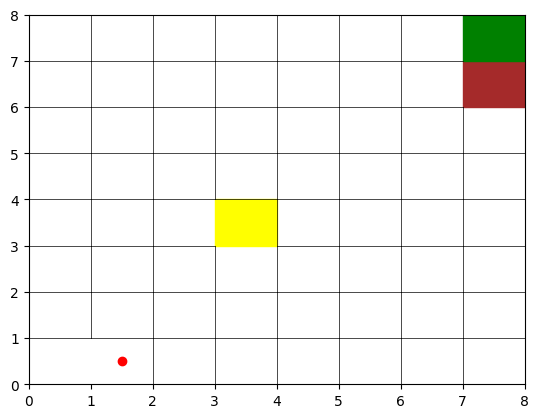

Actions taken: down
. . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

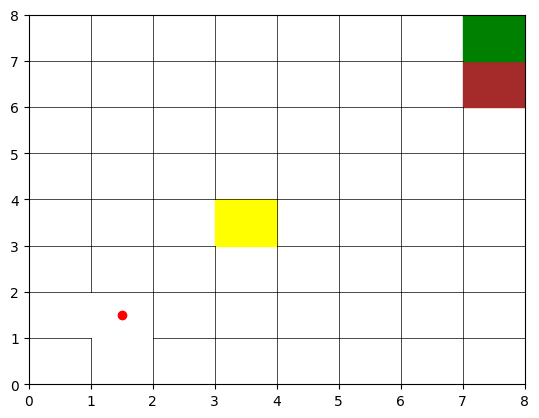

Actions taken: down
. . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

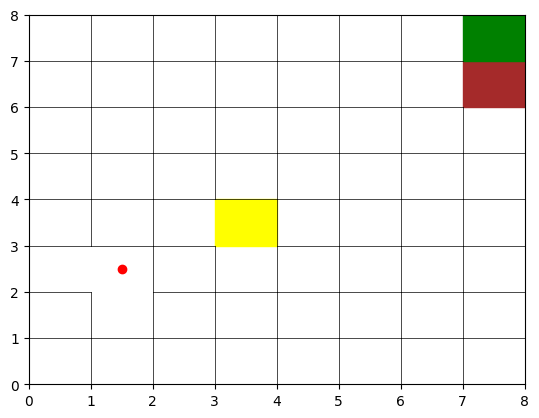

Actions taken: right
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

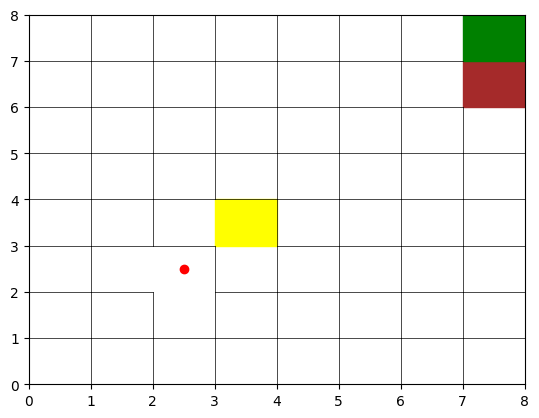

Actions taken: right
. . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

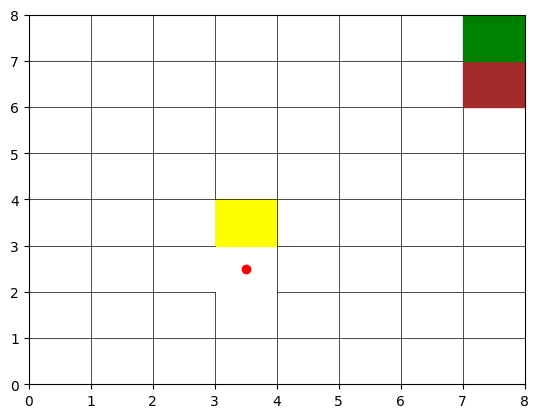

Actions taken: left
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

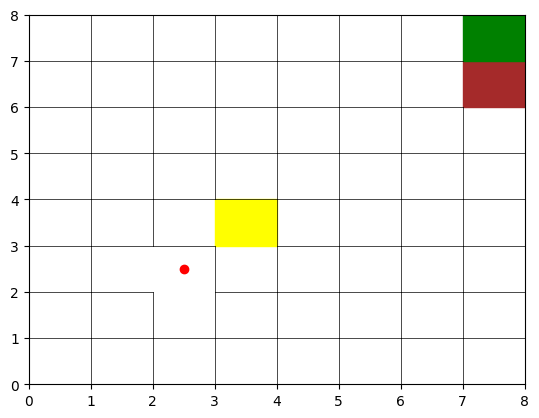

Actions taken: up
. . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

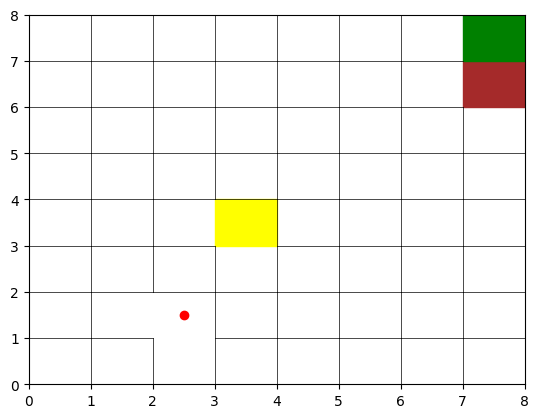

Actions taken: down
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

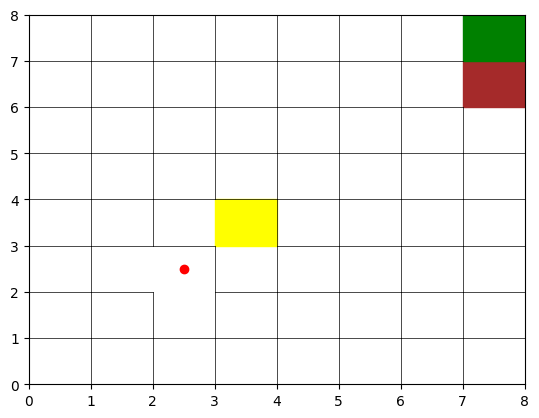

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

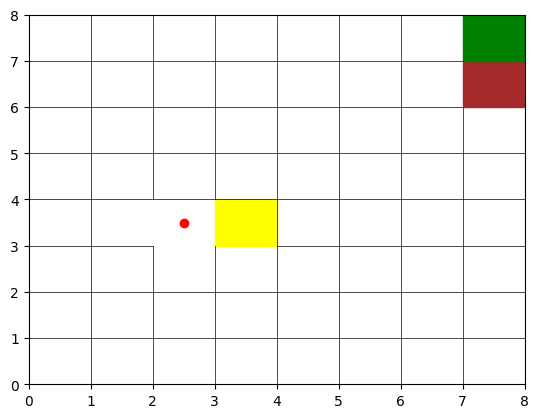

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

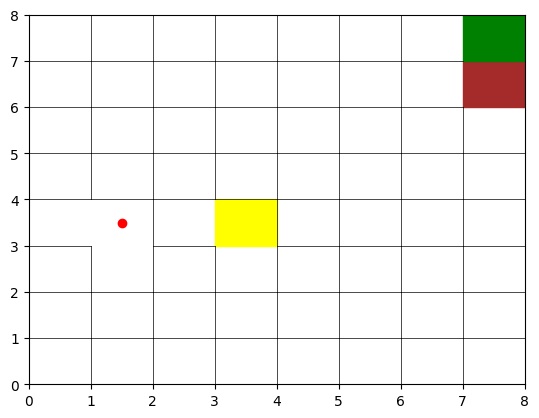

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

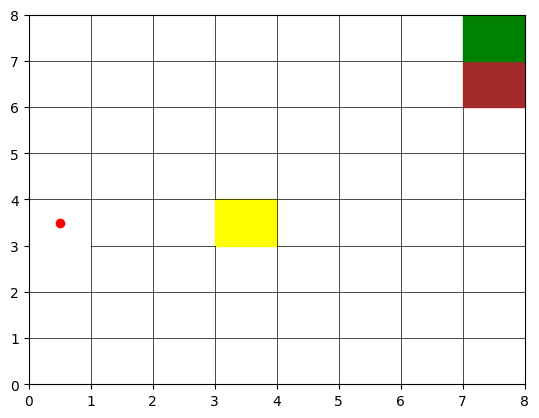

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

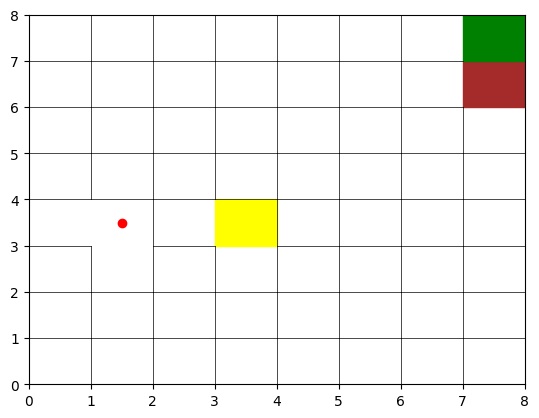

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

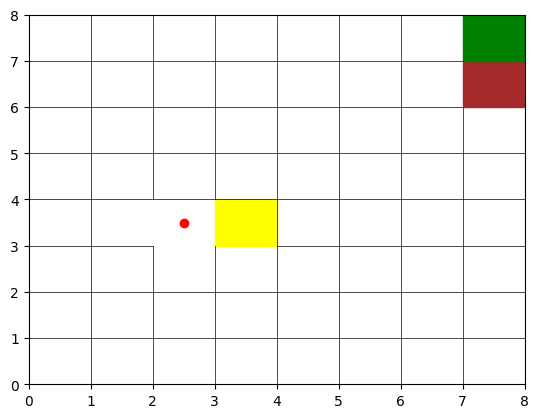

Actions taken: up
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

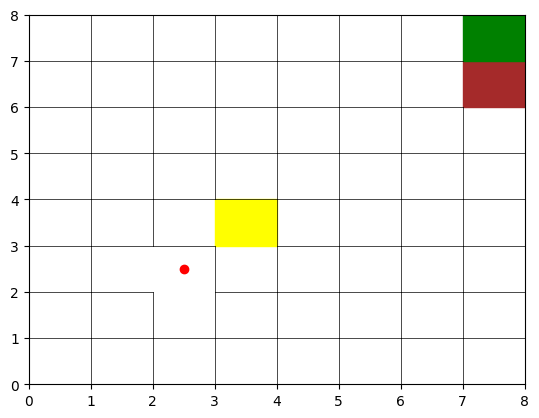

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

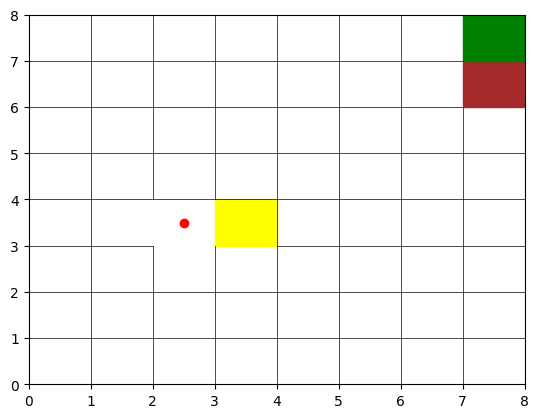

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . 

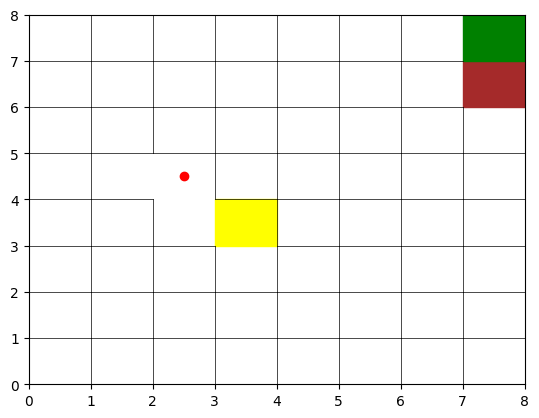

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . 

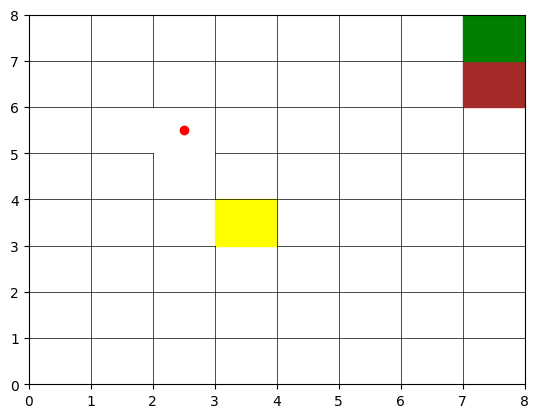

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . 

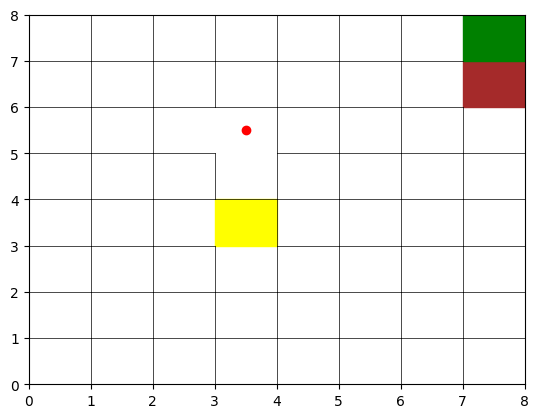

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . 

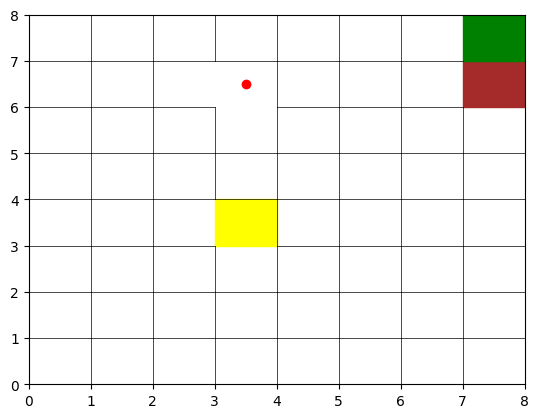

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . 

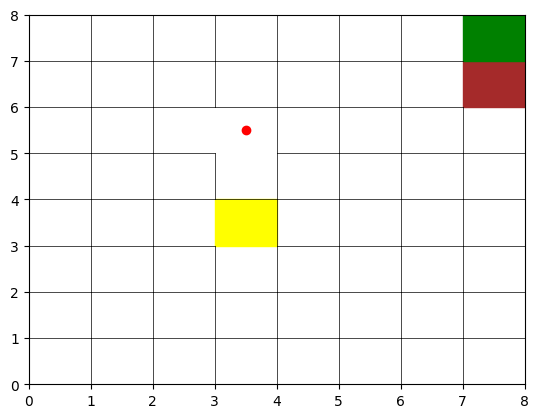

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . 

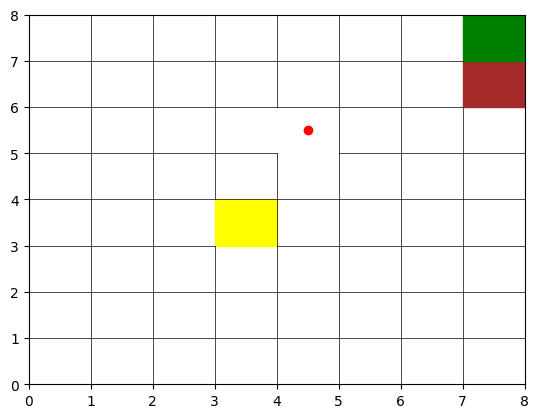

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . 

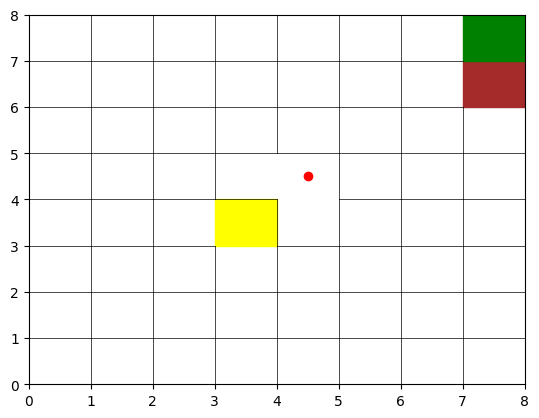

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . 

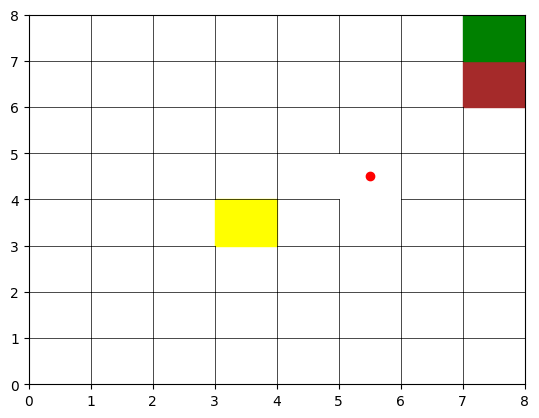

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

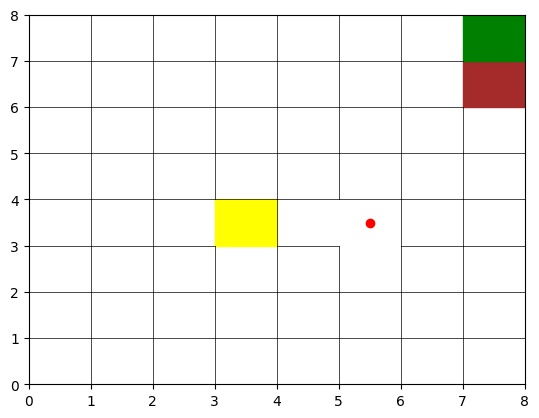

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

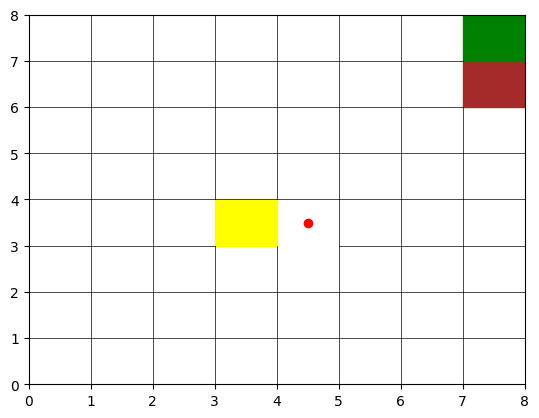

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

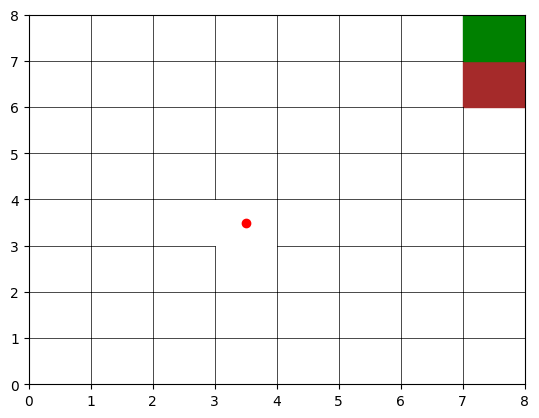

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

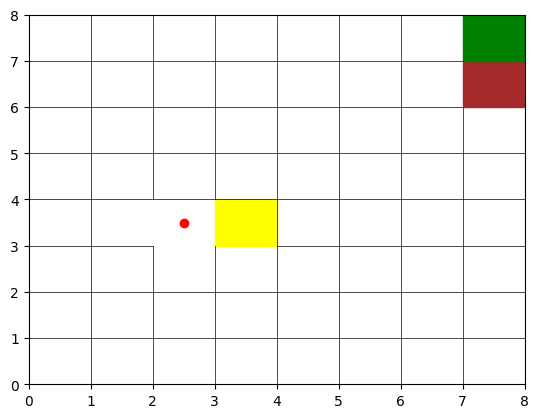

Actions taken: up
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

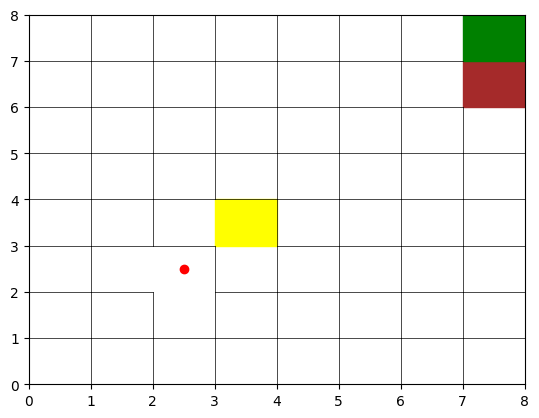

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

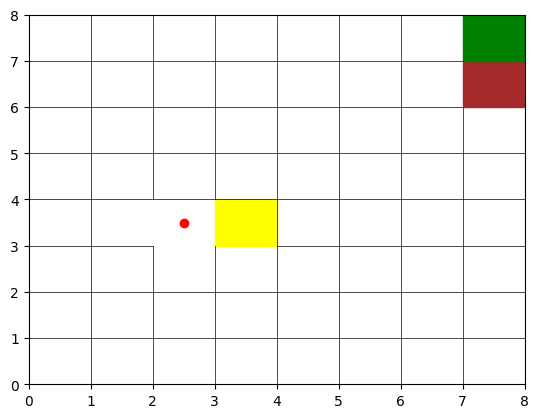

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . 

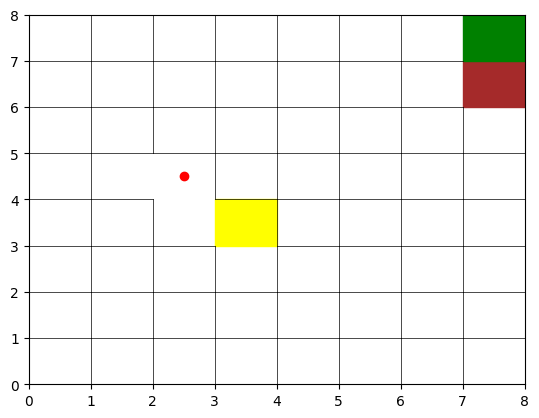

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

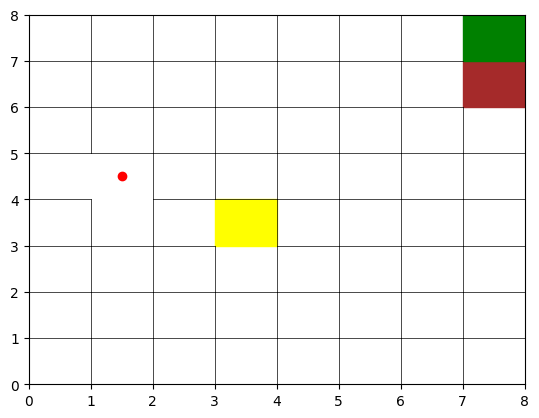

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . 

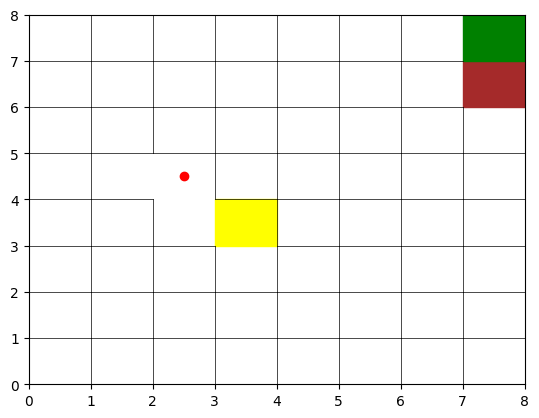

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

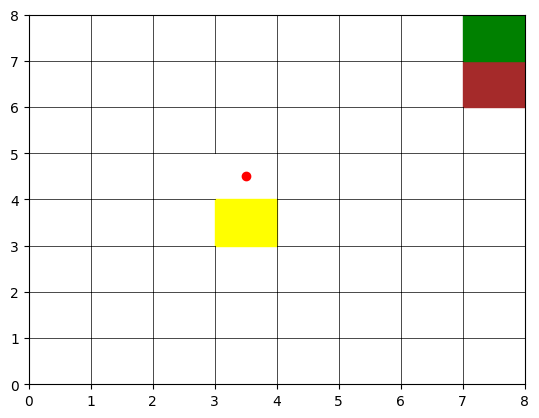

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . 

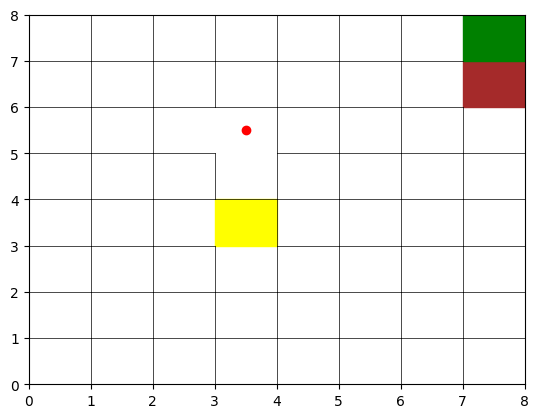

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

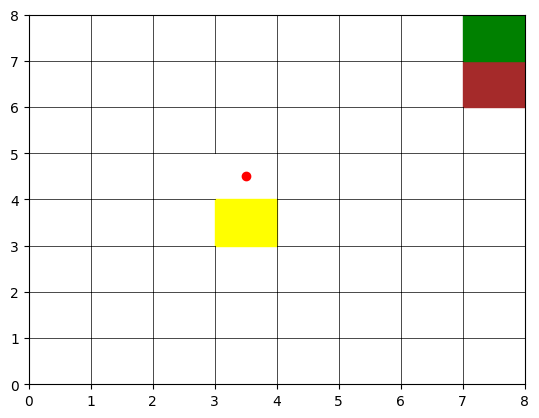

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . 

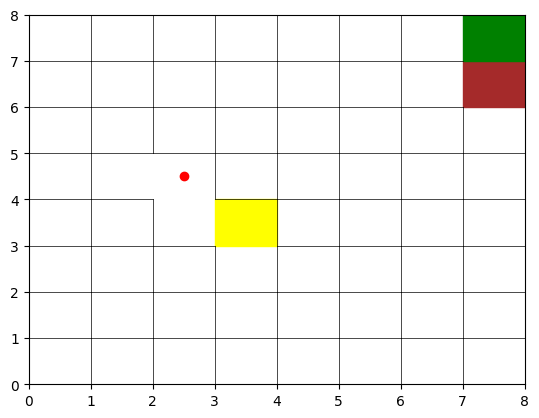

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

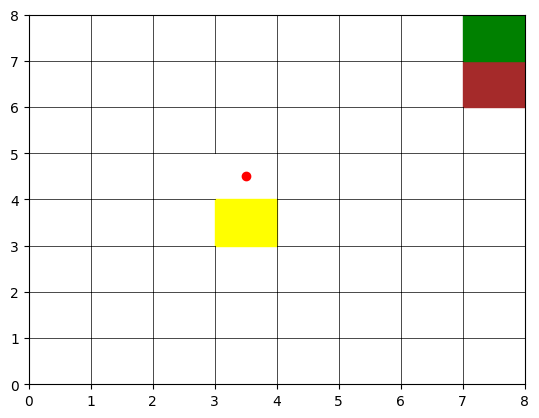

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . 

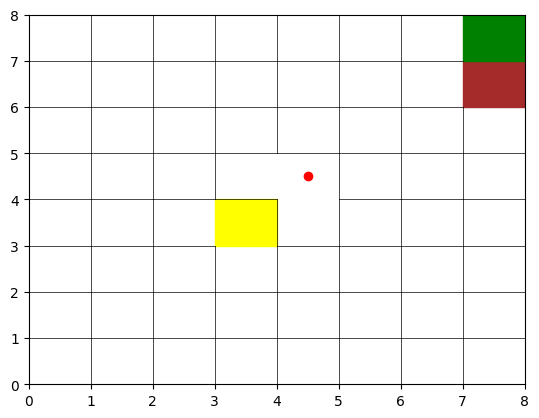

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

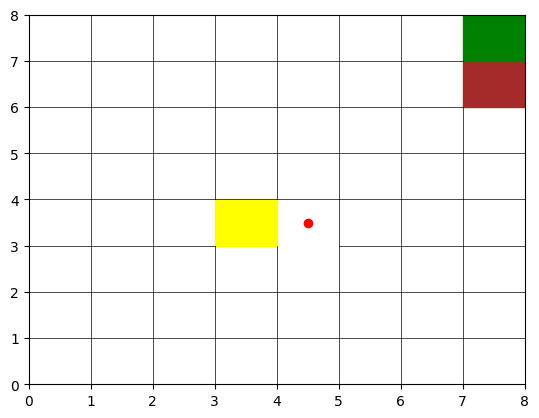

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

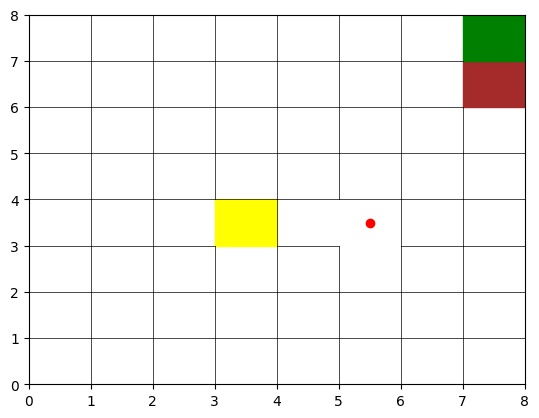

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

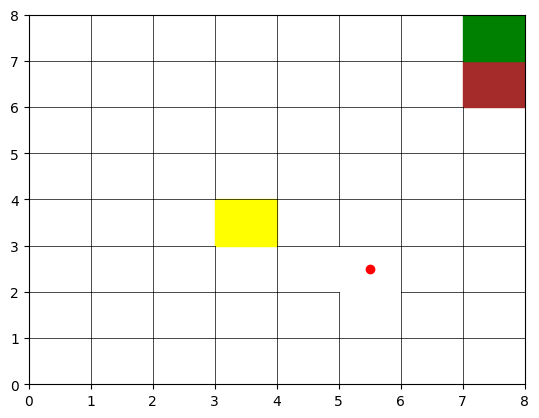

Actions taken: up
. . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

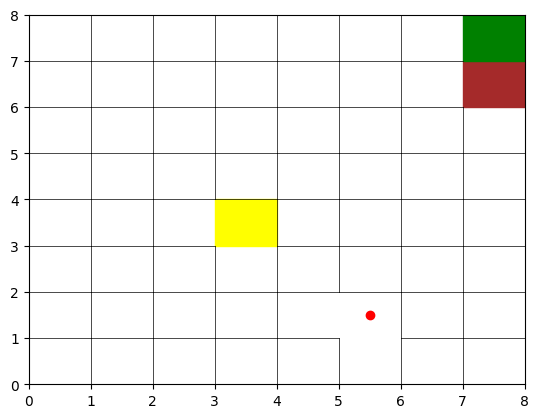

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

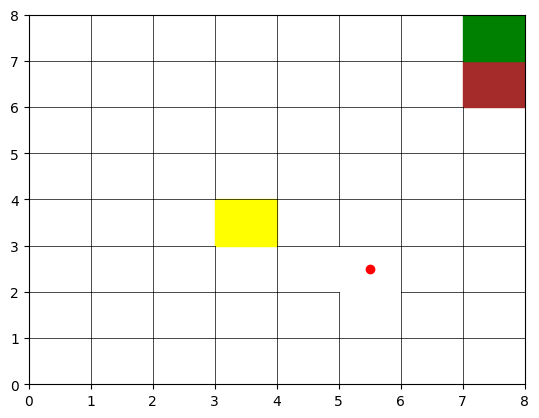

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

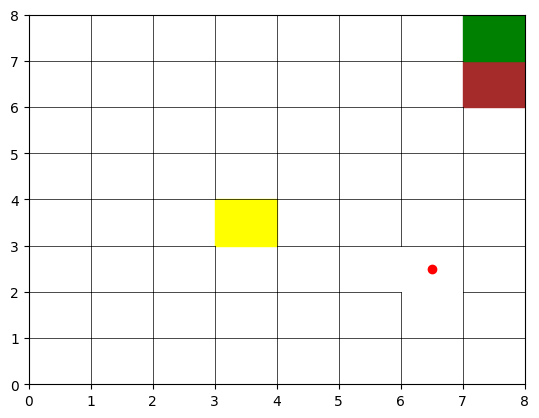

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

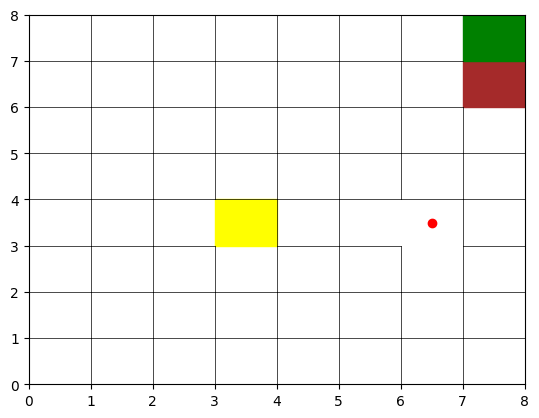

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . 

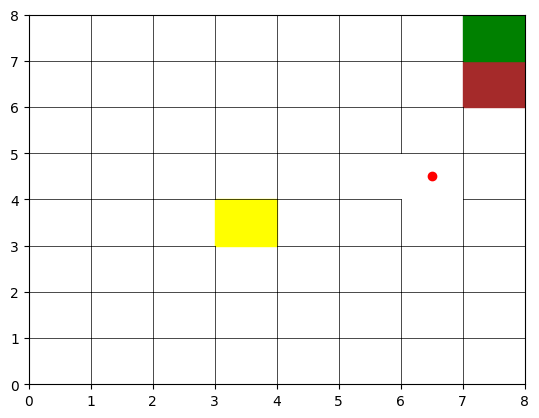

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . 

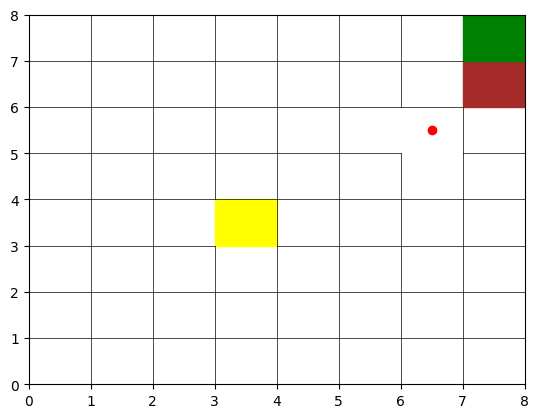

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . 

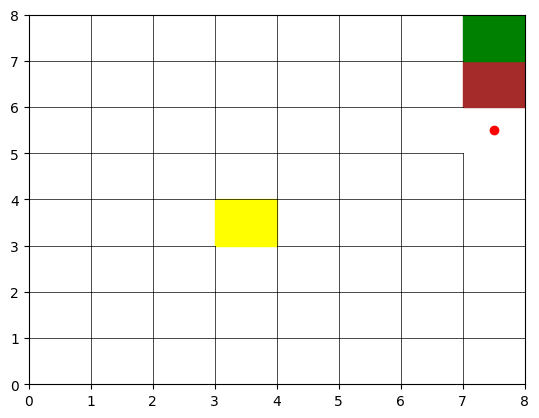

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . 

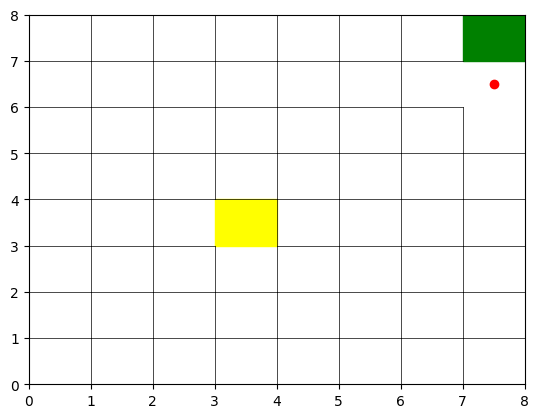

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . 

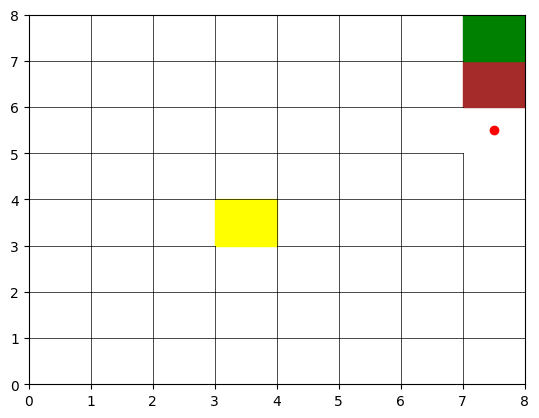

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . 

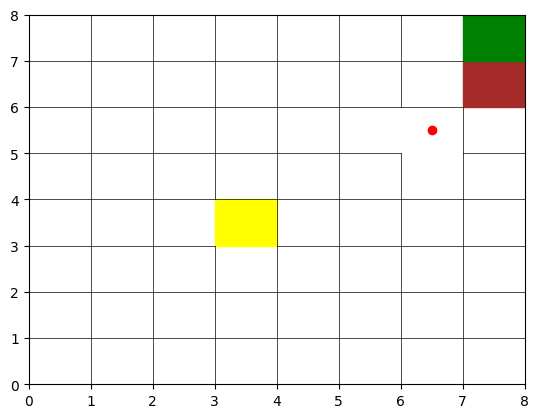

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . 

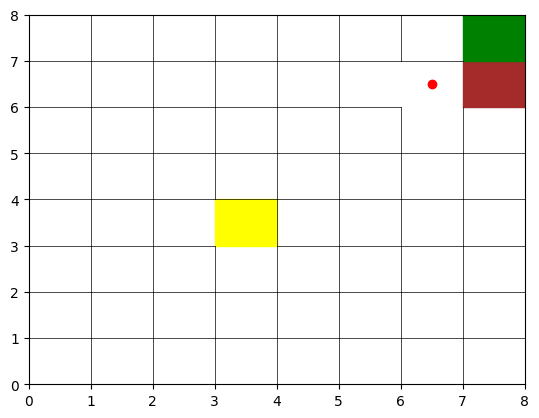

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . 

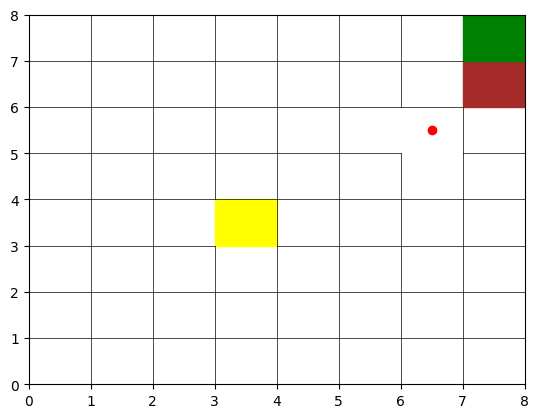

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . 

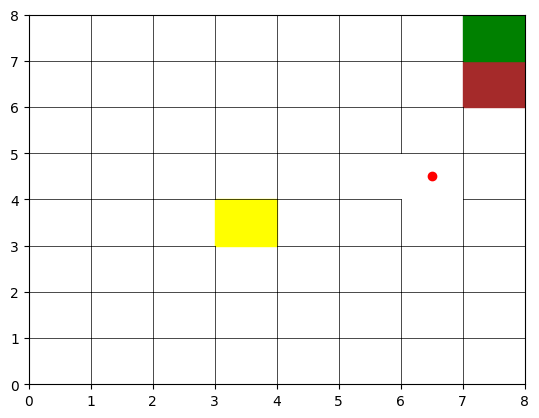

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . 

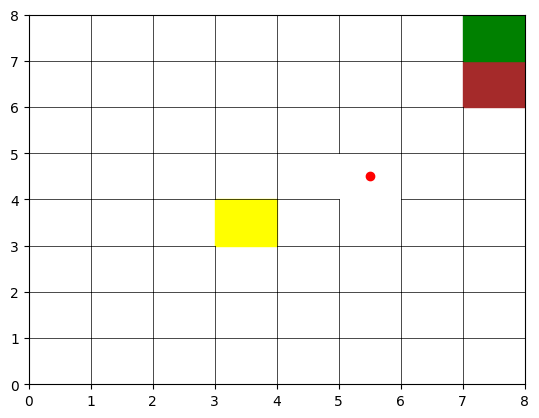

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . 

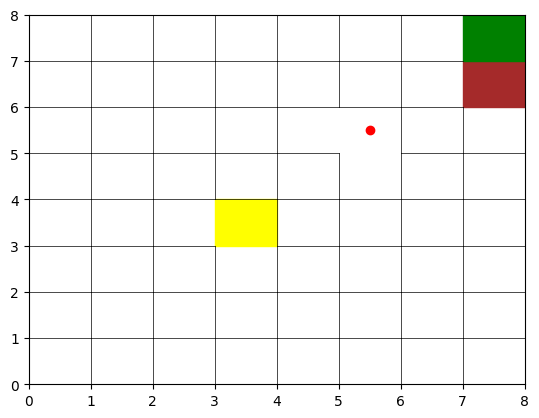

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . 

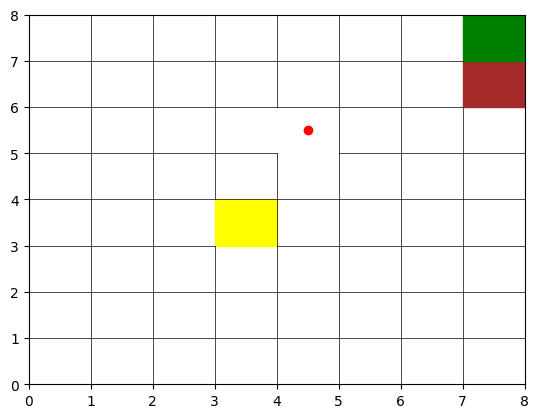

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . 

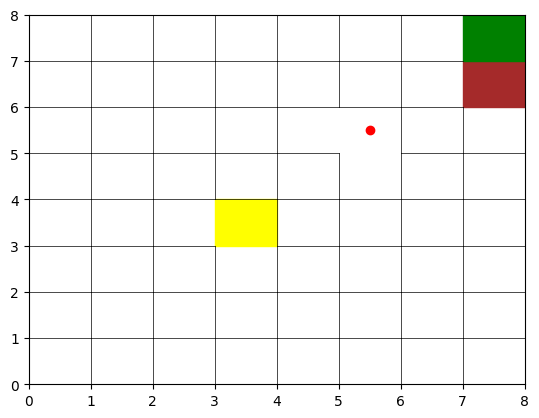

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . 

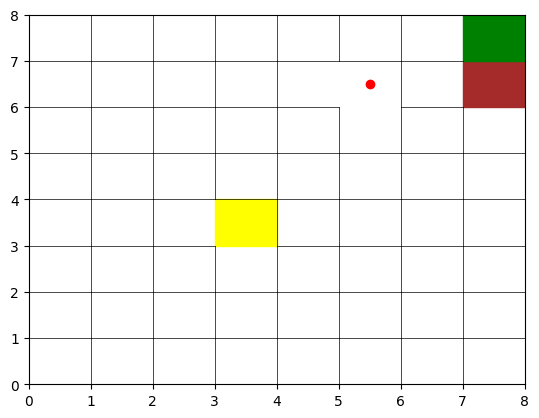

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . 

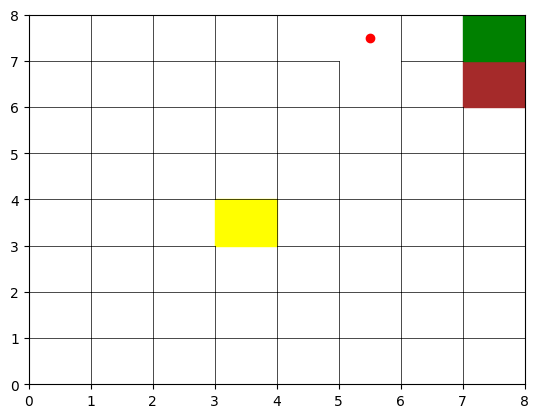

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . 

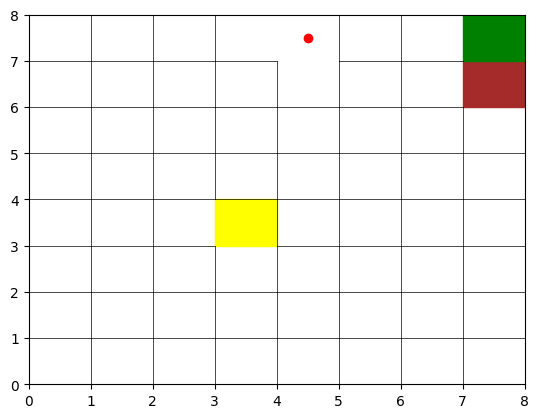

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . 

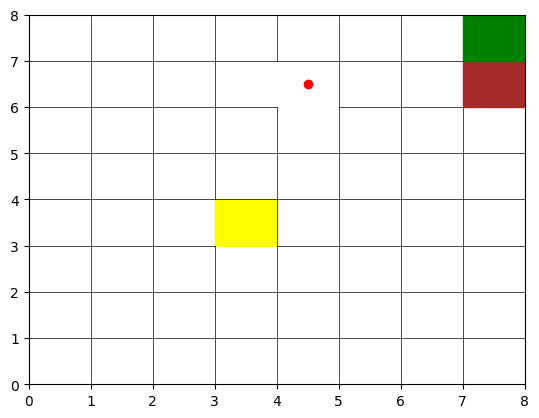

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . 

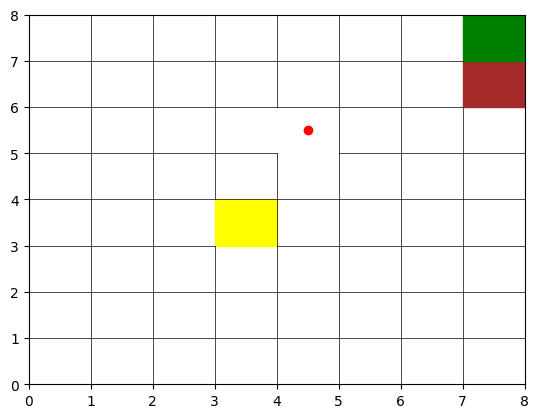

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . 

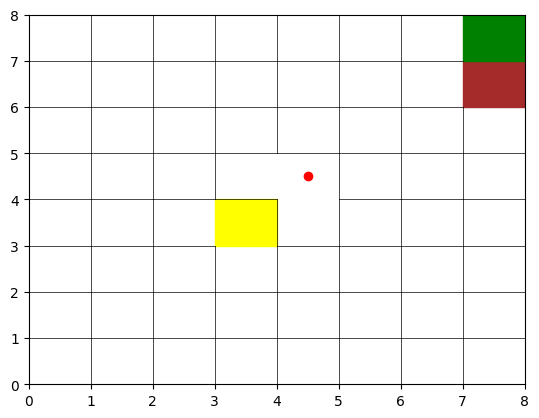

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

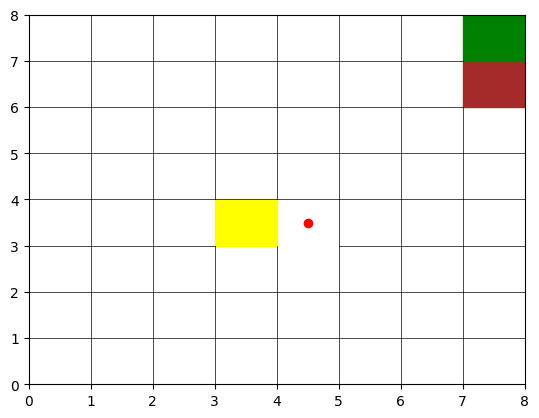

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

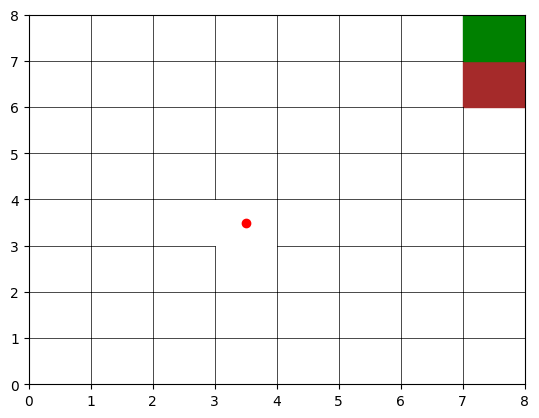

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

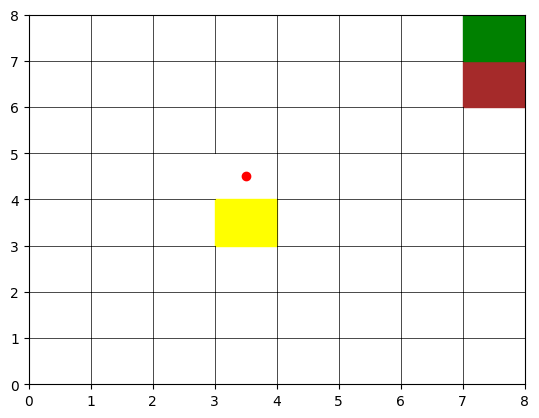

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . 

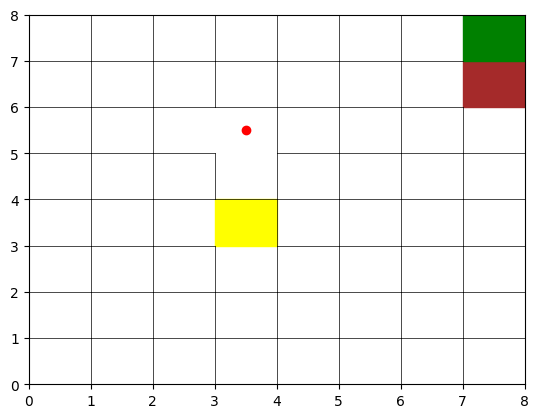

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

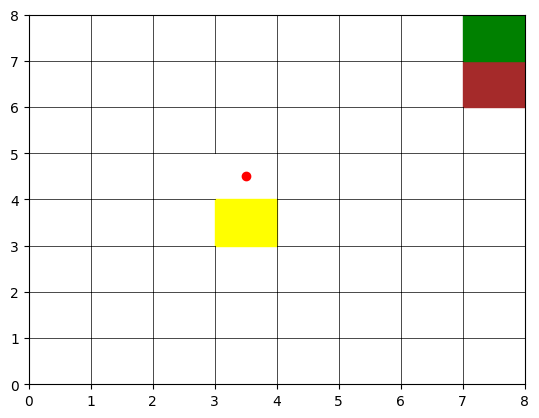

Actions taken: down
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . 

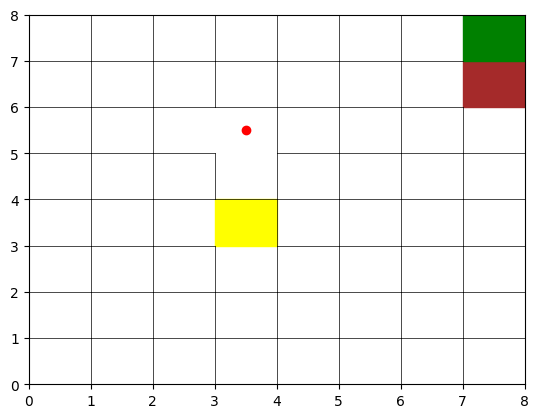

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . 

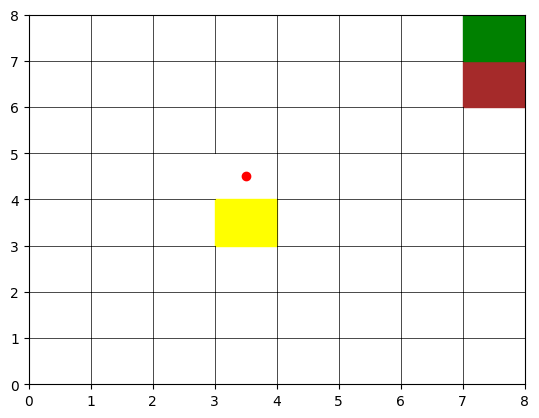

Actions taken: up
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

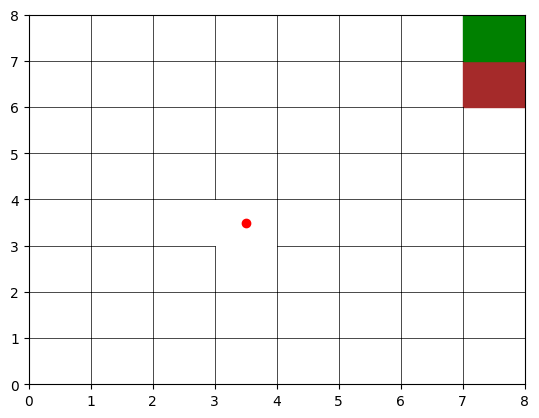

Actions taken: left
. . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

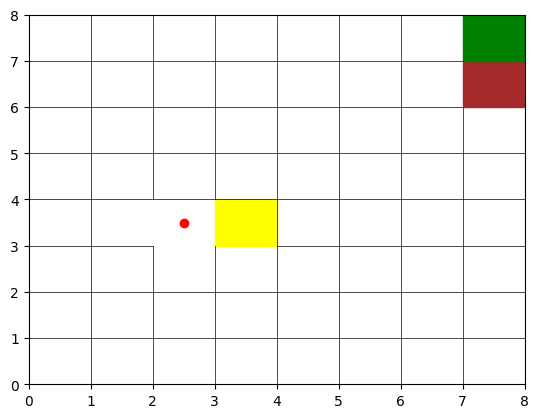

Actions taken: right
. . . . . . . . . . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

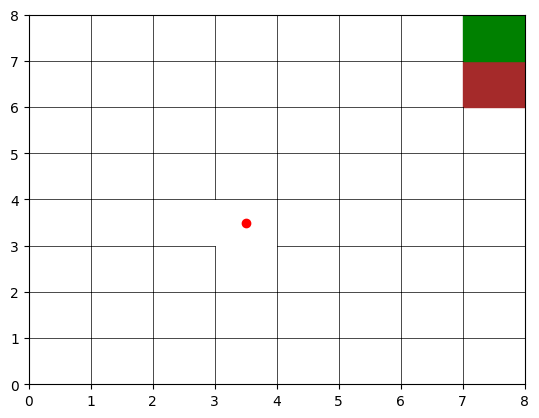

Actions taken: up
. . . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

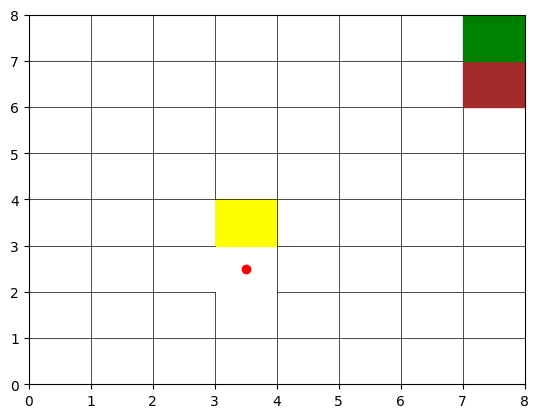

Actions taken: left
. . . . . . . . . . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

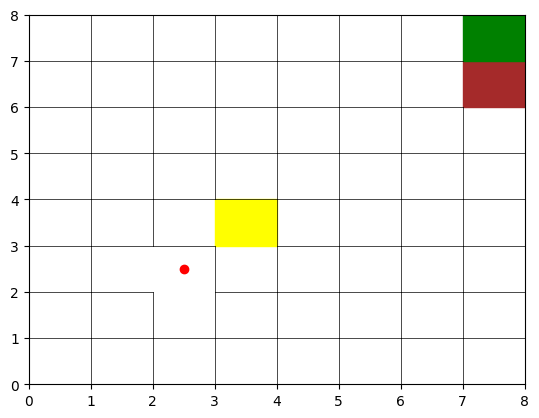

Actions taken: up
. . . . . . . . . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

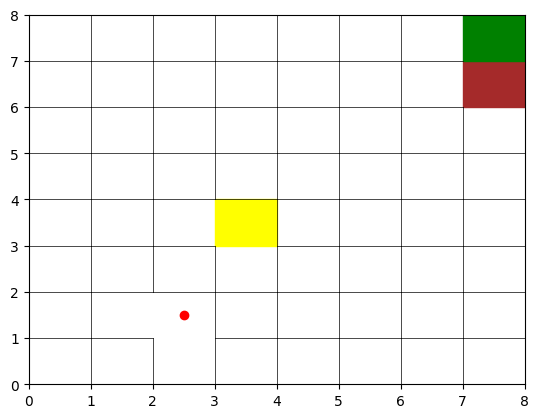

Actions taken: up
. . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

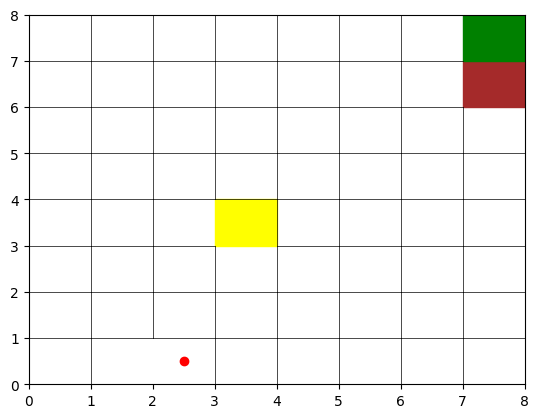

Actions taken: right
. . . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

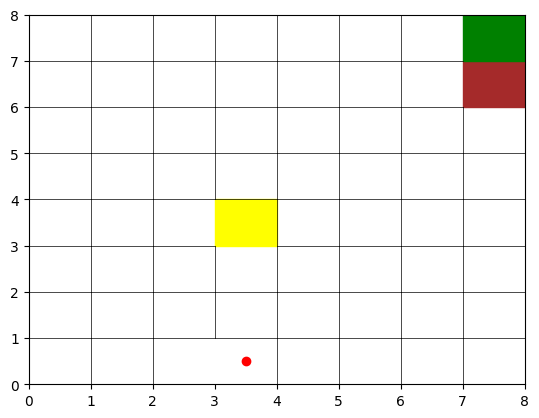

Actions taken: left
. . Agent Position . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

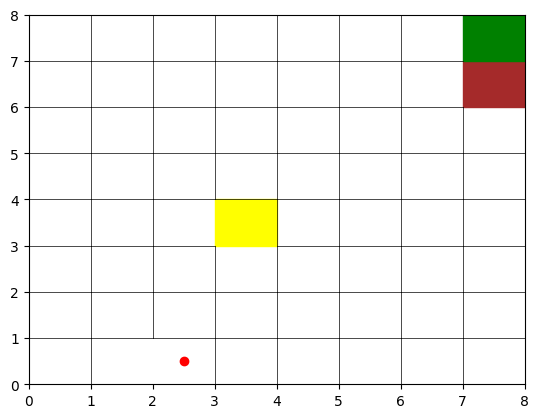

In [119]:
width = 8
height = 8
start = (0, 0)
target = (7, 7)
mountains = [(6, 7)]
quicksand = [(3, 3)]

grid = GridWorld(height, width, start, target, mountains, quicksand)
current_position = grid.start

for _ in range(80):
  current_position, action= agent_steps(grid.grid, current_position)
  print(f"Actions taken: {action}")
  print_grid(grid.grid, current_position)